# Simulation of CNCS powder experiment

In [1]:
# some goodies
%matplotlib inline
from matplotlib import pyplot as plt
import os, numpy as np, histogram.hdf as hh, histogram as H

## Create workflow

In [2]:
# Change me
workdir = os.path.expanduser("~/simulations/CNCS/sample-env-orange-cryostat/try1")
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/simulations/CNCS/sample-env-orange-cryostat/try1


In [3]:
# rm -rf mysim/

In [4]:
!mcvine workflow powder --instrument=CNCS --sample=V --workdir=mysim

In [5]:
!ls mysim/

beam	    debug-scatter  README.md   sampleassembly  sss	test-scatter
create-nxs  Makefile	   reduce2iqe  scatter	       sss.pml


## Beam simulation

In [6]:
# change to beam sim directory
%cd {workdir}/mysim

/SNS/users/lj7/simulations/CNCS/sample-env-orange-cryostat/try1/mysim


** Use an existing beam simulation**

In [7]:
rm -rf beam/

In [8]:
!ln -s /SNS/software/miniconda2/envs/py2/share/mcvine/datastore/beam/CNCS/Ei_3.32meV-f1_60-f2_60-f3_60-f41_300-f42_300-fluxmode_9.0-ncount_2e9 \
        beam

In [9]:
cd beam

/SNS/software/miniconda2/envs/py2/share/mcvine/datastore/beam/CNCS/Ei_3.32meV-f1_60-f2_60-f3_60-f41_300-f42_300-fluxmode_9.0-ncount_2e9


In [10]:
ls 

cncs_moderator2sample.pml
_m2sout/
mcvine-instruments-cncs-beam.params
mcvine-instruments-cncs-config_mod2sample.params
mcvine-instruments-cncs-mod2sample.params
out/
run-beam.sh*
run-m2s.sh


After the beam simulation is done
* The main output are in the new folder "out".
* The ".h5" files are histograms of various sorts.
* The "neutron" file is the simulated neutrons of the beam incident on the sample

In [12]:
!ls out

ienergy.h5  ix_divx.h5	ix_y.h5     iy_divy.h5	props.json
itof.h5     ix_divy.h5	iy_divx.h5  neutrons	rank0-step0


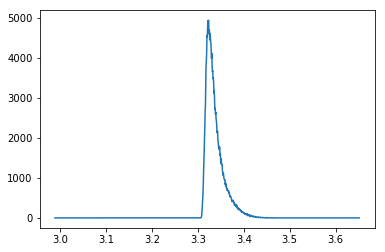

In [13]:
# plot I(E) spectrum
ie = hh.load("out/ienergy.h5")
plt.plot(ie.energy, ie.I)

# Sample

In [14]:
cd {workdir}/mysim

/SNS/users/lj7/simulations/CNCS/sample-env-orange-cryostat/try1/mysim


** Use the orange cryostat template ** 

In [15]:
rm -rf sampleassembly/

In [16]:
cp -a  /SNS/software/miniconda2/envs/py2/share/mcvine/datastore/sample/orange-cryostat sampleassembly

### Make sure you have all the scatterer files for the kernel with the Right name

In [17]:
ls -l sampleassembly/

total 74
lrwxrwxrwx 1 lj7 users   16 Mar  8  2017 Al-can-1-scatterer.xml -> Al-scatterer.xml
lrwxrwxrwx 1 lj7 users   16 Mar  8  2017 Al-can-2-scatterer.xml -> Al-scatterer.xml
-rw-r--r-- 1 lj7 users 4734 Nov 13  2013 Al.laz
-rw-r--r-- 1 lj7 users  513 Feb 19 23:09 Al-scatterer.xml
-rw-r--r-- 1 lj7 users   76 Nov 13  2013 Al.xyz
lrwxrwxrwx 1 lj7 users   16 Feb 19 23:09 Outer-window-scatterer.xml -> Al-scatterer.xml
-rw-r--r-- 1 lj7 users 1680 Feb 19 23:08 sampleassembly.xml
lrwxrwxrwx 1 lj7 users   16 Feb 19 23:09 Shield-scatterer.xml -> Al-scatterer.xml
drwxr-xr-x 2 lj7 users    7 Nov 22  2016 V-phonons/
-rw-rw-r-- 1 lj7 users  710 Feb 19 23:09 V-scatterer.xml
lrwxrwxrwx 1 lj7 users   16 Feb 19 23:09 VTI-soda-scatterer.xml -> Al-scatterer.xml
-rw-rw-r-- 1 lj7 users   57 Jun  4  2016 V.xyz


## Scattering simulation and reduction

The simulation directory contains a Makefile and various scripts to make it easy to run the simulation and analsysis.

In [18]:
%cd {workdir}/mysim
!ls

/SNS/users/lj7/simulations/CNCS/sample-env-orange-cryostat/try1/mysim
beam	    debug-scatter  README.md   sampleassembly  sss	test-scatter
create-nxs  Makefile	   reduce2iqe  scatter	       sss.pml


In [19]:
!make clean

rm -rf out work-* log.* *~ *.h5 *.nxs


In [20]:
# print beam simulation information
!cat {workdir}/mysim/beam/out/props.json

{'emission time': '167.31192132 microsecond', 'flux': '224915.953931 counts per 34kJ pulse', 'tof fwhm': '54.6029077176 microsecond', 'average tof': '45555.7668888 microsecond', 'average energy': '3.33669363864 meV'}

** !!! Modify the following cell by setting ei_guess and t0_guess to values printed out in the cell above !!! **

In [21]:
%%file reduce2iqe
#!/usr/bin/env bash
time mcvine instruments arcs nxs reduce sim.nxs --qaxis=0 3 0.01 --tof2E  --ei_guess=3.337 --t0_guess=167.312

Overwriting reduce2iqe


In [22]:
%%time
# run simulation and reduction
# !chmod +x scatter sss reduce2iqe create-nxs
!make NCOUNT=1e7 NODES=10 BUFFER_SIZE=1000000

NCOUNT=1e7 BUFFER_SIZE=1000000 NODES=10 ./scatter </dev/null >log.scatter 2>&1
INSTRUMENT=cncs NODES=10 ./create-nxs </dev/null >log.create-nxs 2>&1
INSTRUMENT=cncs QAXIS="0 15 0.1" ./reduce2iqe >log.reduce 2>&1
CPU times: user 1min 1s, sys: 11.1 s, total: 1min 12s
Wall time: 48min 23s


In [ ]:
#cat log.scatter

## Plot the Simulation

In [23]:
iqe = hh.load("iqe.h5")

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/histogram/data_plotter.py:352: RuntimeWarning: invalid value encountered in less
  negative_median = N.median( z[ z<0 ] )
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/histogram/data_plotter.py:334: RuntimeWarning: invalid value encountered in greater
  positive_median = N.median( z[ z>0 ] )


plot z in (0, 4.02084781616e-06)


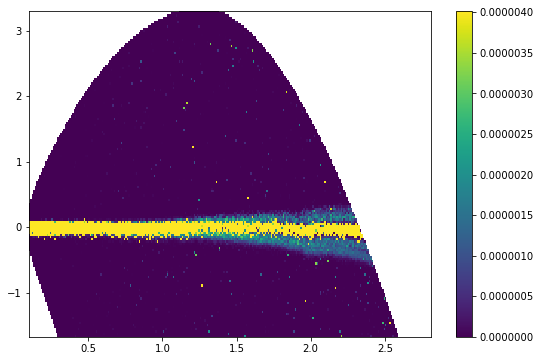

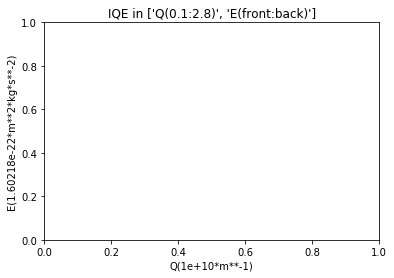

In [24]:
plt.figure(figsize=(9,6))
H.plot(iqe[(0.1,2.8),()], min=0)